In [29]:
# import dependencies
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
csvpath = "merged_data.csv"


In [30]:
df = pd.read_csv(csvpath)
df

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5
1,2009,21,15,197500,141050,0.0475,2.1307,0.72,PT01,2,5,1,59,5
2,2009,21,117,219000,106017,0.0475,1.6015,0.70,PT01,2,5,2,27,5
3,2009,21,37,244000,125539,0.0500,1.8964,0.80,PT01,2,5,1,32,5
4,2009,21,15,417000,360272,0.0450,5.4422,0.35,PT01,2,5,1,46,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17162,2018,21,111,308000,185086,0.0463,2.5886,0.80,PT01,2,5,1,35,5
17163,2018,51,61,392000,146568,0.0475,1.2506,0.80,PT01,2,5,1,45,5
17164,2018,37,63,292000,107208,0.0463,1.3301,0.80,PT01,1,5,1,39,5
17165,2018,37,147,315200,104844,0.0488,1.7076,0.80,PT01,2,5,1,75,5


In [31]:
df = df.loc[df["Income"] < 100000,:]
df

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5
7,2009,12,71,162291,80000,0.0500,1.3180,0.98,PT01,1,5,2,37,5
8,2009,21,49,242400,76992,0.0538,1.2125,0.80,PT01,2,5,1,71,5
9,2009,21,151,136972,34656,0.0538,0.8193,0.99,PT01,1,5,2,30,4
10,2009,21,67,180667,91032,0.0525,1.4005,0.99,PT01,2,5,1,36,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17121,2018,47,37,268110,83112,0.0438,1.1096,0.90,PT01,1,5,1,27,5
17122,2018,47,9,297300,81516,0.0438,1.2240,0.80,PT07,2,2,1,33,5
17128,2018,13,121,285475,68568,0.0488,0.9167,0.95,PT11,2,3,2,74,5
17160,2018,37,183,300000,78696,0.0475,0.9335,0.70,PT07,2,5,2,34,4


In [32]:
df_rate = df[["Race", "Credit Score", "Rate", "Year"]]
df_rate

,Race,Credit Score,Rate,Year
0,5,5,0.0488,2009
7,5,5,0.0500,2009
8,5,5,0.0538,2009
9,5,4,0.0538,2009
10,5,3,0.0525,2009
...,...,...,...,...
17121,5,5,0.0438,2018
17122,2,5,0.0438,2018
17128,3,5,0.0488,2018
17160,5,4,0.0475,2018


In [33]:
def interest(rate,amount,years):
    t = years*12
    m_rate = rate/12.
    month = amount * (m_rate*(1+m_rate)**t)/(((1+m_rate)**t)-1)
    final = round(month*years*12,2)
    return(final)
def total_paid(amount,rate,LTV,years):
    loan = interest(rate,amount,years)
    tot = amount/LTV # total value of home before interest on loan
    down_pay = round(tot-amount,2)
    total = loan + down_pay
    return(total)

In [34]:
amount = np.array(df['Amount'].tolist())
ltv = np.array(df['LTV'].tolist())
rat = np.array(df['Rate'].tolist())
tp = []
for amount,ltv,rate in zip(amount,ltv,rat):
    tp.append(total_paid(amount,rate,ltv,30))
df['Total'] = tp
df.head()

/Users/catherineluquire/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score,Total
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5,319123.86
7,2009,12,71,162291,80000,0.0500,1.3180,0.98,PT01,1,5,2,37,5,316948.80
8,2009,21,49,242400,76992,0.0538,1.2125,0.80,PT01,2,5,1,71,5,549525.35
9,2009,21,151,136972,34656,0.0538,0.8193,0.99,PT01,1,5,2,30,4,277658.65
10,2009,21,67,180667,91032,0.0525,1.4005,0.99,PT01,2,5,1,36,3,360978.87


In [35]:
years = df['Year'].unique()
rates = []
totals = []
incomes = []
new_ratio = []
for year in years:
    temp_df = df.loc[df['Year'] == year,:]
#     temp_df = temp_df.loc[temp_df['Income']<200000,:]
    rates.append(np.median(temp_df['Rate']))
    incomes.append(temp_df['Income'].median())
    totals.append(np.median(temp_df['Total']))
    total_ratio = []
    for a,b in zip(temp_df['Total'],temp_df['Income']):
        total_ratio.append(a/b)
    new_ratio.append(np.median(total_ratio))

In [36]:
df = df[["Year", "Total", "Income", "Race", "Credit Score", "Rate"]]
df = df.groupby(["Year", "Race"]).median()
df["Total/Inc Ratio"] = df["Total"]/df["Income"]
df = df.reset_index("Race")
df = df[["Race", "Total/Inc Ratio", "Credit Score", "Rate"]]
df.head()

,Race,Total/Inc Ratio,Credit Score,Rate
Year,,,,
2009,1,5.360189,1.5,0.0519
2009,2,4.032391,5.0,0.0525
2009,3,7.347129,2.0,0.0544
2009,5,5.052730,4.0,0.0525
2009,7,5.098750,4.0,0.0513


In [37]:
bins = [0, 1, 2, 3, 4, 5, 7]
group_names = ["Indigenous", "Asian", "Black", "Pacific Islander", "White", "Not Provided"]
df["Bins"] = pd.cut(df["Race"], bins, labels=group_names, include_lowest=True)
df = df[["Total/Inc Ratio", "Bins", "Credit Score", "Rate"]]
df

,Total/Inc Ratio,Bins,Credit Score,Rate
Year,,,,
2009,5.360189,Indigenous,1.5,0.05190
2009,4.032391,Asian,5.0,0.05250
2009,7.347129,Black,2.0,0.05440
2009,5.052730,White,4.0,0.05250
2009,5.098750,Not Provided,4.0,0.05130
2010,5.786046,Indigenous,3.0,0.04880
2010,6.387560,Asian,5.0,0.04565
2010,6.459913,Black,3.0,0.04500
2010,4.814437,White,4.0,0.04750


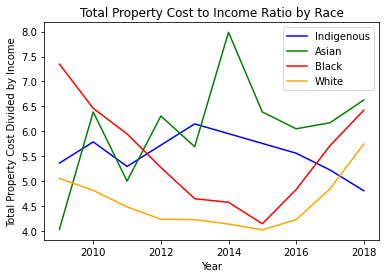

In [38]:
indig, = plt.plot(df.loc[df["Bins"]=="Indigenous", ["Total/Inc Ratio"]], color="blue", label="Indigenous")
asian, = plt.plot(df.loc[df["Bins"]=="Asian", ["Total/Inc Ratio"]], color="green", label="Asian")
black, = plt.plot(df.loc[df["Bins"]=="Black", ["Total/Inc Ratio"]], color="red", label="Black")
# pi, = plt.plot(df.loc[df["Bins"]=="Pacific Islander", ["Total/Inc Ratio"]], color="yellow", label="Pacific Islander")
# np, = plt.plot(df.loc[df["Bins"]=="Not Provided", ["Total/Inc Ratio"]], color="gray", label="Not Provided")
white, = plt.plot(df.loc[df["Bins"]=="White", ["Total/Inc Ratio"]], color="orange", label="White")

plt.legend(handles=[indig, asian, black, white], loc="best")
plt.title("Total Property Cost to Income Ratio by Race")
plt.ylabel("Total Property Cost Divided by Income")
plt.xlabel("Year")
plt.tight_layout
plt.savefig(f"TotalbyRace")

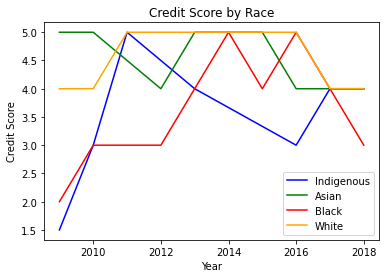

In [39]:
indig, = plt.plot(df.loc[df["Bins"]=="Indigenous", ["Credit Score"]], color="blue", label="Indigenous")
asian, = plt.plot(df.loc[df["Bins"]=="Asian", ["Credit Score"]], color="green", label="Asian")
black, = plt.plot(df.loc[df["Bins"]=="Black", ["Credit Score"]], color="red", label="Black")
# pi, = plt.plot(df.loc[df["Bins"]=="Pacific Islander", ["Total/Inc Ratio"]], color="yellow", label="Pacific Islander")
# np, = plt.plot(df.loc[df["Bins"]=="Not Provided", ["Total/Inc Ratio"]], color="gray", label="Not Provided")
white, = plt.plot(df.loc[df["Bins"]=="White", ["Credit Score"]], color="orange", label="White")

plt.legend(handles=[indig, asian, black, white], loc="best")
plt.title("Credit Score by Race")
plt.ylabel("Credit Score")
plt.xlabel("Year")
plt.tight_layout
plt.savefig(f"CreditbyRace")




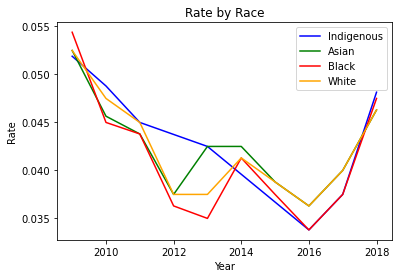

In [40]:
indig, = plt.plot(df.loc[df["Bins"]=="Indigenous", ["Rate"]], color="blue", label="Indigenous")
asian, = plt.plot(df.loc[df["Bins"]=="Asian", ["Rate"]], color="green", label="Asian")
black, = plt.plot(df.loc[df["Bins"]=="Black", ["Rate"]], color="red", label="Black")
# pi, = plt.plot(df.loc[df["Bins"]=="Pacific Islander", ["Total/Inc Ratio"]], color="yellow", label="Pacific Islander")
# np, = plt.plot(df.loc[df["Bins"]=="Not Provided", ["Total/Inc Ratio"]], color="gray", label="Not Provided")
white, = plt.plot(df.loc[df["Bins"]=="White", ["Rate"]], color="orange", label="White")

plt.legend(handles=[indig, asian, black, white], loc="best")
plt.title("Rate by Race")
plt.ylabel("Rate")
plt.xlabel("Year")
plt.tight_layout
plt.savefig(f"RatebyRace")


In [41]:
df_rate.head()

,Race,Credit Score,Rate,Year
0,5,5,0.0488,2009
7,5,5,0.0500,2009
8,5,5,0.0538,2009
9,5,4,0.0538,2009
10,5,3,0.0525,2009


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

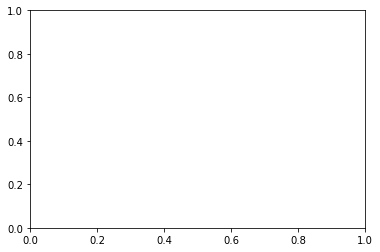

In [47]:
race_groupby = df_rate.groupby("Race")
race_groupby = race_groupby.fillna(0)
x_axis= race_groupby["Year"].unique()
x_axis

# rate = race_groupby["Rate"].median()
# credit = race_groupby["Credit Score"].median()
# label= ("Rate", "Credit Score")
# #Plot
# plt.plot(x_axis, rate, label ="Rate")
# plt.plot(x_axis, credt, label ="Credit Score")
# plt.xlabel('Years')
# # Set a title of the current axes.
# plt.title('Rate & Credit Score')
# # show a legend on the plot
# plt.legend()
# # Display a figure.
# plt.show()


